In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv('dermatology.csv')
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [57]:
df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [58]:
df.age.values

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 22.,
       10., 65., 40., 30., 38., 23., 17.,  8., 51., 42., 44., 22., 33.,
       10., 17., 43., 50., 50., 10., 34., nan, nan, nan, nan, 15., 26.,
       46., 51., 62., 15., 35., 30., 48., 46., 12., 52., 60., 32., 35.,
       41., 48., 51., 19., 22., 29., 25., 33.,  8., 40., 33., 42., 36.,
       60., 36., 21., 40., 21., 34., 13., 52., 48., 17., 25., 33., 62.,
       52., 27., 40., 31., 27., 10., 55., 30., 42., 48., 22., 31., 50.,
       43., 30., 42., 22., 18., 35., 60., 28., 13., 20., 64., 43., 20.,
       34., 39., 60., 38., 44., 36., 41., 18., 39., 40., 47., 16., 27.,
       52., 25.,  0., 33., 46.,  7., 30., 29., 23.,  8., 44., 17., 16.,
       55., 40., 34., 29., 34., 25., 70., 37., 41., 32., 20., 19., 61.,
       27., 36., 40., 52., 27., 30., 45., 34., 27., 46., 52., 28., 40.,
       55., 32., 33., 47., 35., 61., 22., 10., 20., 55., 67., 51., 20.,
       22., 45., 55., 56., 18., 40., 30., 33., 40., 42., 36., 27

In [59]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
age_imp=pd.DataFrame(imp.fit_transform(np.array(df.age).reshape(-1,1)))

In [60]:
df.age=age_imp

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [62]:
df.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [75]:
x=df.drop(columns=['class'])
y=df['class']

In [92]:
x.shape

(366, 34)

In [94]:
from sklearn.feature_selection import VarianceThreshold
select=VarianceThreshold(threshold=0)
x=select.fit_transform(x)

In [95]:
x.shape

(366, 34)

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)

In [78]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=15)

In [69]:
from sklearn.model_selection import GridSearchCV
PARAMETERS = {
              "max_depth":[ 5, 10],
              "min_child_weight":[2,10],
              "learning_rate":[0.01, 0.1],
              "n_estimators":[100,200]}
model_gs = GridSearchCV(xgb_model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(xtrain,ytrain)

print(model_gs.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 100}


In [79]:
xgb_model = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 10, min_child_weight=2,n_estimators= 100)

In [80]:
xgb_model.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [81]:
from sklearn.metrics import accuracy_score,classification_report
ypred = xgb_model.predict(xtest)
print(accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

0.972972972972973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        11
           3       1.00      0.86      0.92        14
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         6

    accuracy                           0.97        74
   macro avg       0.98      0.98      0.97        74
weighted avg       0.98      0.97      0.97        74



In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(xtrain)
X_test_reduced = pca.transform(xtest)

In [90]:
xgb_model.fit(X_train_reduced, ytrain)
ypred_pca= xgb_model.predict(X_test_reduced)
print(accuracy_score(ytest, ypred_pca))
print(classification_report(ytest, ypred_pca))

0.7702702702702703
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.50      0.75      0.60        12
           2       1.00      1.00      1.00        11
           3       0.67      0.43      0.52        14
           4       0.79      0.73      0.76        15
           5       0.67      0.67      0.67         6

    accuracy                           0.77        74
   macro avg       0.77      0.76      0.76        74
weighted avg       0.79      0.77      0.77        74



In [96]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(xtrain)


/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sara/Documents/python/mlvenv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [97]:
X_reduced_tsne.shape

(292, 2)

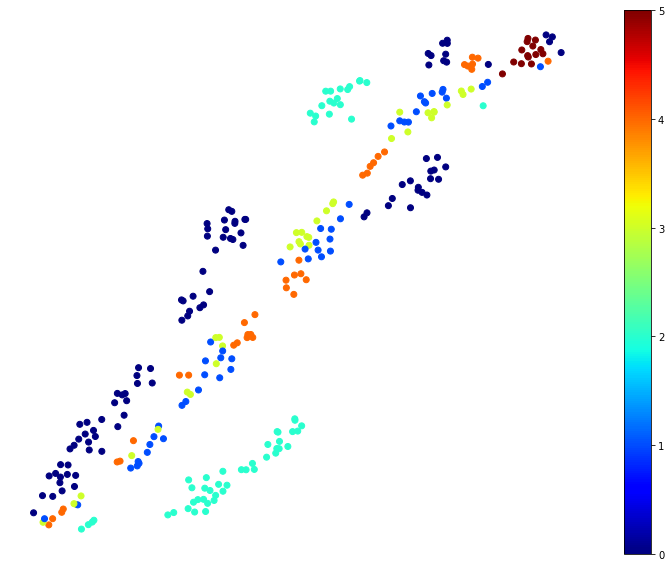

In [98]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=ytrain, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()